##**LOAN APPROVAL PREDICTION**

####**DATA EXPLORATION**

In [3]:
import pandas as pd
import seaborn as sns

# Load the dataset

loan_data = pd.read_csv('/content/train.csv')
loan_data_info = loan_data.info()
loan_data_head = loan_data.head()

loan_data_info, loan_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

(None,
    id  person_age  person_income person_home_ownership  person_emp_length  \
 0   0          37          35000                  RENT                0.0   
 1   1          22          56000                   OWN                6.0   
 2   2          29          28800                   OWN                8.0   
 3   3          30          70000                  RENT               14.0   
 4   4          22          60000                  RENT                2.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
 0   EDUCATION          B       6000          11.49                 0.17   
 1     MEDICAL          C       4000          13.35                 0.07   
 2    PERSONAL          A       6000           8.90                 0.21   
 3     VENTURE          B      12000          11.11                 0.17   
 4     MEDICAL          A       6000           6.92                 0.10   
 
   cb_person_default_on_file  cb_person_cred_hist_length  loan_st

The dataset has 58,645 entries and 13 columns.

**Columns Description:**

**id:** Unique identifier for each record.

**person_age:** Age of the individual.

**person_income:** Annual income of the individual.

**person_home_ownership:** Home ownership status (e.g., RENT, OWN).

**person_emp_length:** Length of employment in years.

**loan_intent:** Purpose of the loan (e.g., EDUCATION, MEDICAL).

**loan_grade:** Grade of the loan.

**loan_amnt:** Amount of the loan.

**loan_int_rate:** Interest rate of the loan.

**loan_percent_income:** Loan amount as a percentage of income.

**cb_person_default_on_file:** Whether the individual has defaulted on a loan before (Y/N).

**cb_person_cred_hist_length:** Length of credit history in years.

**loan_status:** Target variable indicating whether the loan was approved (1) or denied (0).

**Initial Observations:**

There are no missing values in the dataset.

Columns include numerical, categorical, and binary data types.

The target variable for prediction is loan_status.

###Summary Statistics

                 id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%   

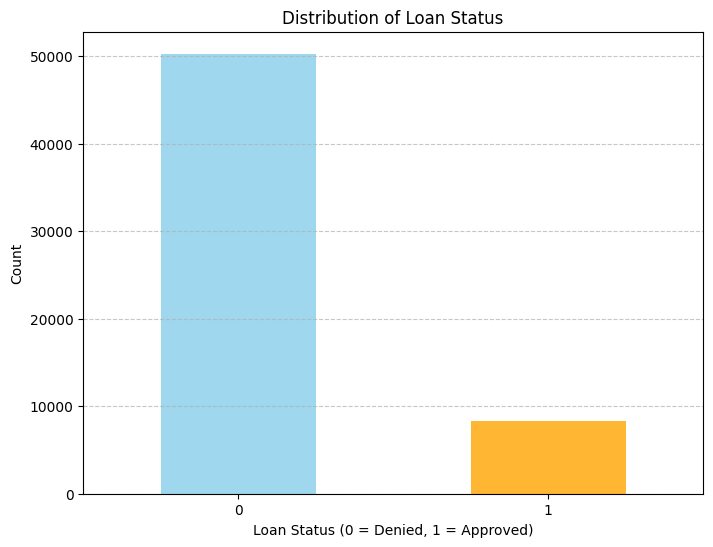

In [4]:
import matplotlib.pyplot as plt

numerical_summary = loan_data.describe()
print(numerical_summary)

loan_status_counts = loan_data['loan_status'].value_counts()

plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Distribution of Loan Status**

There is a clear imbalance in the target variable loan_status:

Most loans are denied (0), while fewer are approved (1).

####Visualization of categorical features to understand their distribution

In [5]:
categorical_data = loan_data.select_dtypes(include=['object'])
numerical_data = loan_data.select_dtypes(include=['int64', 'float64'])

print("Categorical Columns:", categorical_data.columns.tolist())
print("Numerical Columns:", numerical_data.columns.tolist())


Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical Columns: ['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']


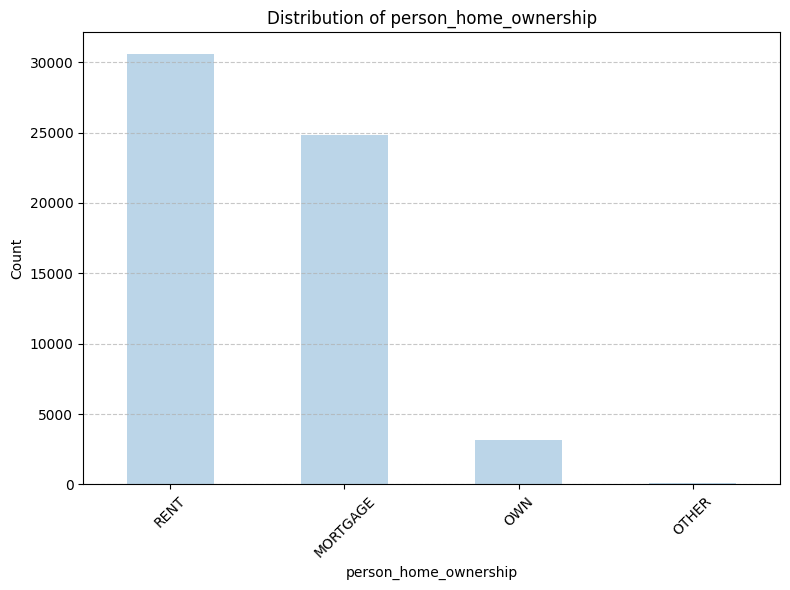

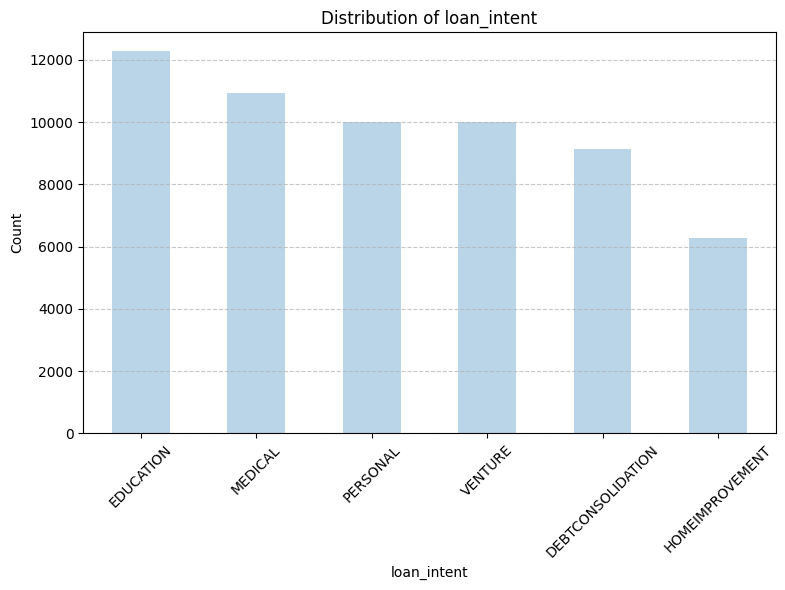

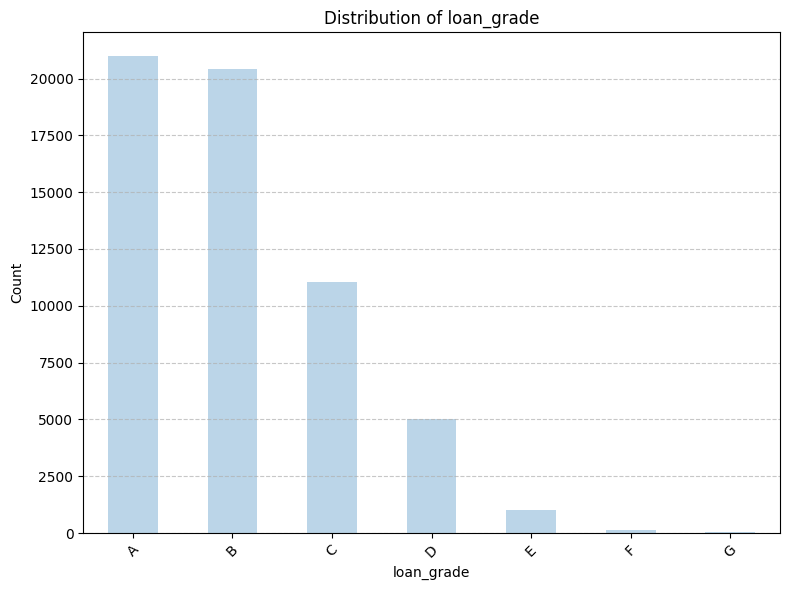

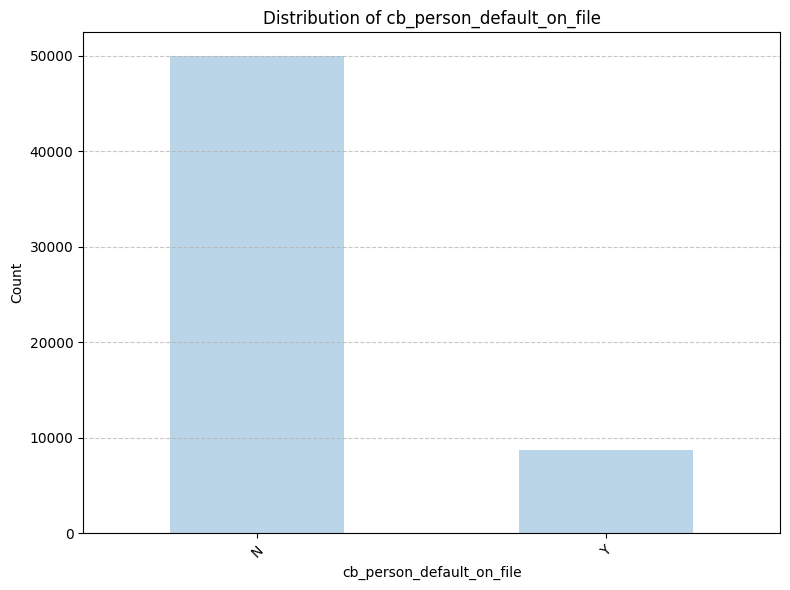

In [6]:
for column in categorical_data:
    plt.figure(figsize=(8, 6))
    loan_data[column].value_counts().plot(kind='bar', alpha=0.3)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


1. **Distribution of person_home_ownership:**

The majority of the individuals are categorized as RENT and MORTGAGE.
A smaller proportion falls under the OWN and OTHER categories.
This suggests that most applicants do not fully own their homes but either rent or have mortgages.

2. **Distribution of loan_intent:**

The most common reasons for taking loans are EDUCATION, MEDICAL, and PERSONAL needs.

Fewer loans are requested for VENTURE, DEBT CONSOLIDATION, and HOME IMPROVEMENT purposes.

This distribution indicates a high focus on loans for essential or personal purposes rather than investment or improvement projects.
3. **Distribution of loan_grade:**

The majority of loans fall under grades A, B, and C, indicating good to moderate creditworthiness.

Very few loans are categorized under grades D, E, F, and G.
This suggests that higher-risk loans are less common in the dataset.

4. **Distribution of cb_person_default_on_file:**

Most individuals (the majority of records) have N (No) for past defaults, indicating they do not have a history of defaulting.
A smaller proportion is marked as Y (Yes), indicating past defaults.

This variable is likely to be a strong predictor of loan approval since it directly relates to credit risk.

###Visualizing the distributions of numerical features

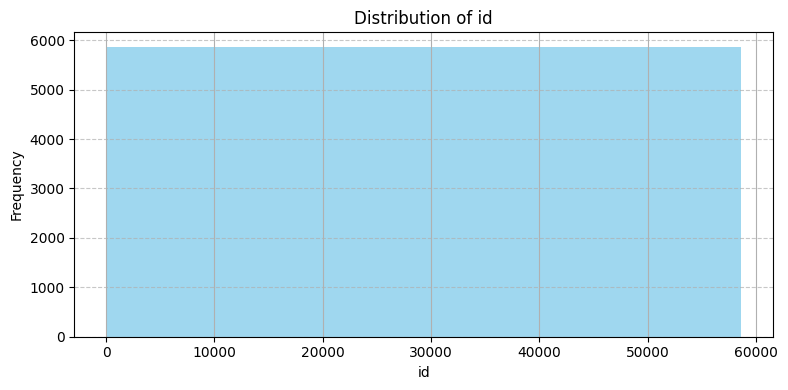

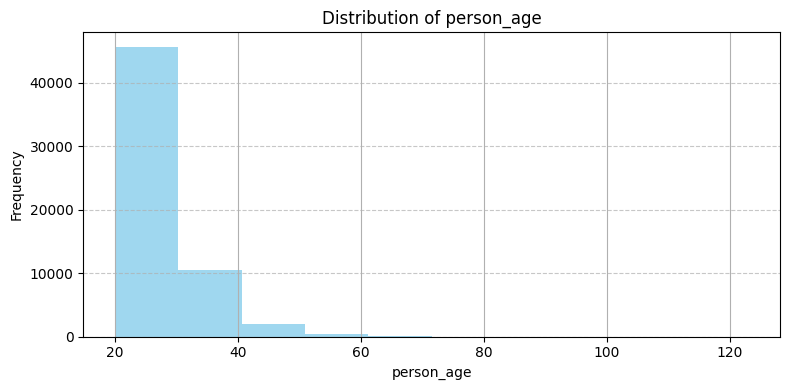

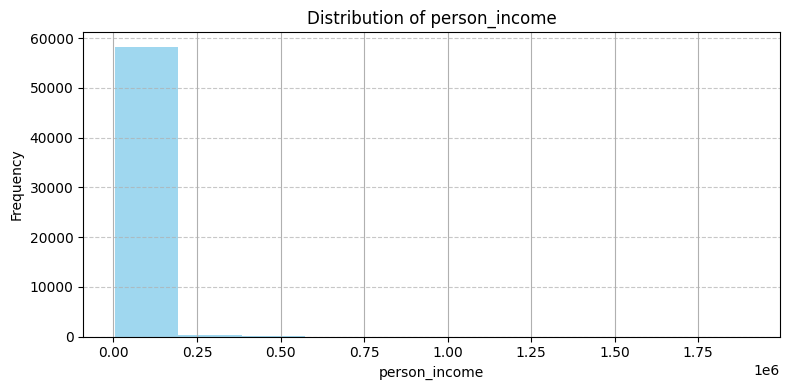

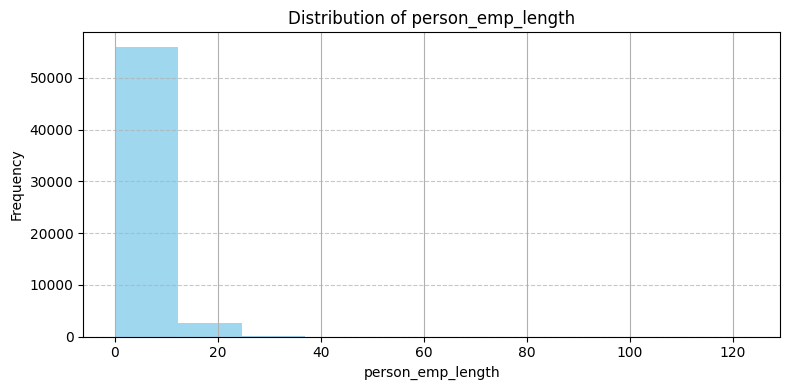

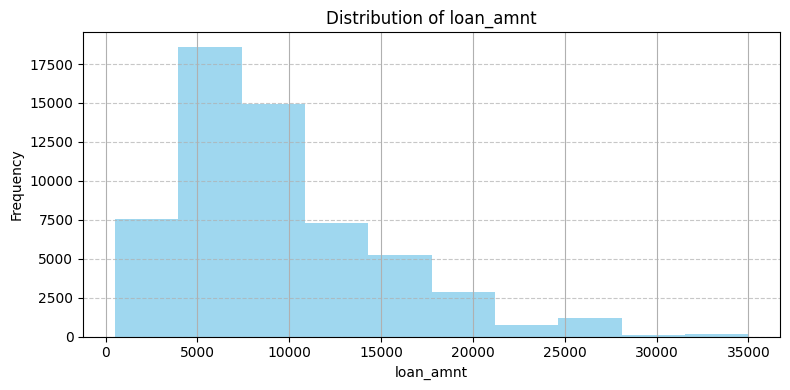

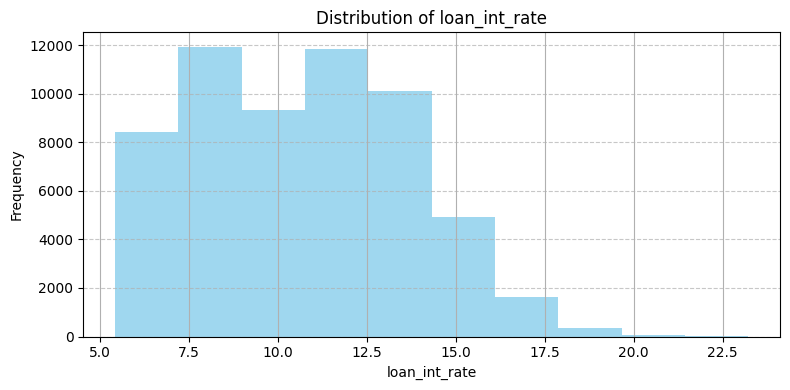

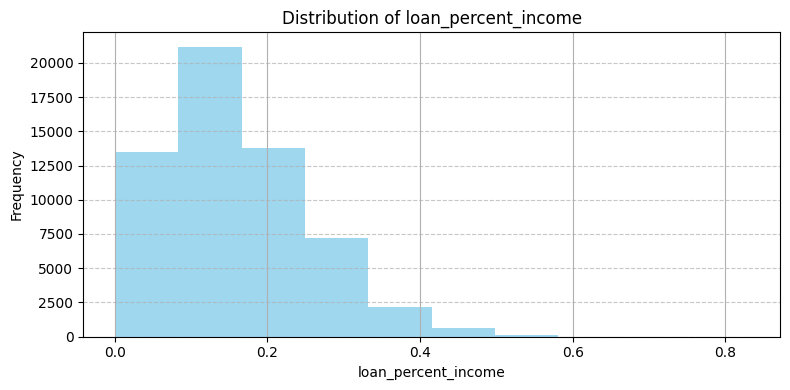

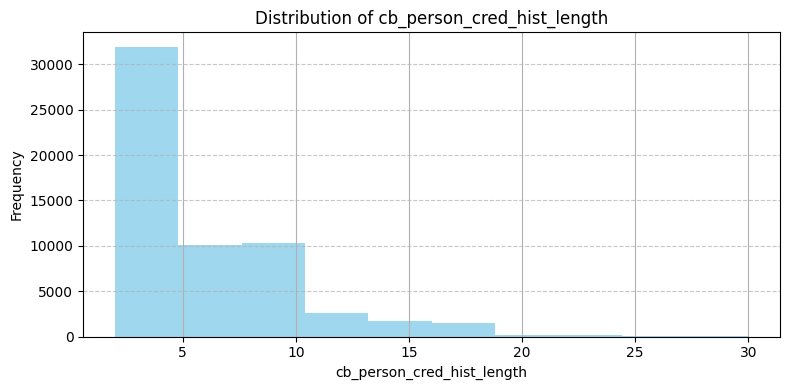

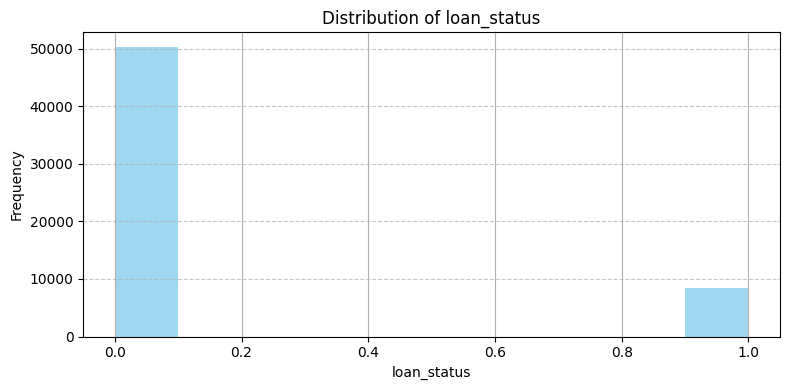

In [7]:
for column in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    loan_data[column].hist(bins=10, color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


1. **id Distribution:**
This column represents a unique identifier for each record.
It has a uniform distribution since it is not a meaningful variable for analysis but rather serves as a record identifier.
2. **person_age Distribution:**
Most applicants fall in the age range of 20 to 40 years.
The distribution is right-skewed, with fewer applicants in older age brackets. A few outliers exist at extremely high ages.
3. **person_income Distribution:**
Most applicants have incomes concentrated at the lower end of the spectrum (below 200,000 dollars).
The distribution is highly right-skewed, with a few outliers representing individuals or entities with extremely high incomes.
4. **person_emp_length Distribution:**
The majority of applicants have employment lengths of less than 20 years.
A few outliers indicate unusually high employment lengths, possibly due to data entry errors.
5. **loan_amnt Distribution:**
Most loan amounts are in the range of 5,000 dollars to 10,000 dollars, with the distribution gradually tapering off at higher amounts.
The distribution is moderately right-skewed.
6. **loan_int_rate Distribution:**
Interest rates are concentrated between 7% and 15%, with the highest frequencies around 10%.
The distribution is slightly skewed to the right.
7. **loan_percent_income Distribution:**
The majority of loans represent a small percentage of the applicant's income, typically below 0.2 (20% of income).
The distribution is right-skewed, with some outliers representing higher percentages of income.
8. **cb_person_cred_hist_length Distribution:**
Most applicants have a credit history length between 2 and 10 years.
The distribution is right-skewed, with a few outliers indicating unusually long credit histories.
9. **loan_status Distribution:**
The target variable shows a class imbalance.
Most loans are denied (0), while only a small proportion is approved (1).


####Visualizing relationships between numerical features and loan_status

<Figure size 800x600 with 0 Axes>

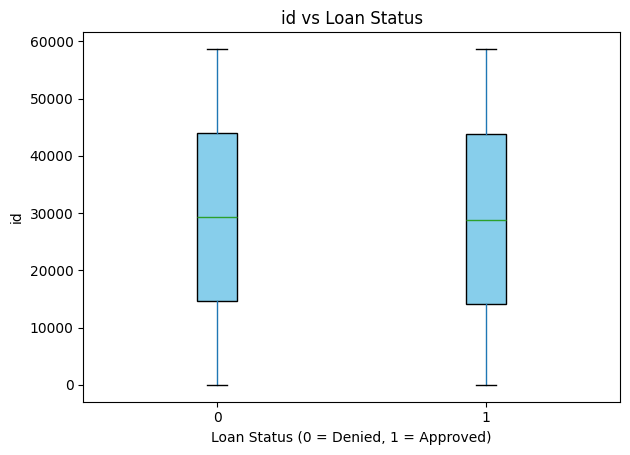

<Figure size 800x600 with 0 Axes>

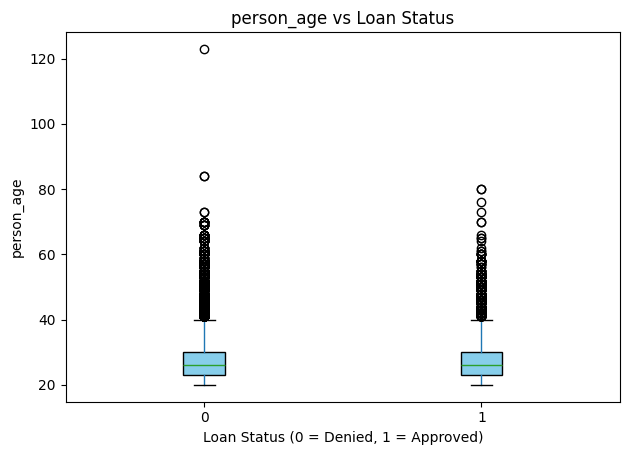

<Figure size 800x600 with 0 Axes>

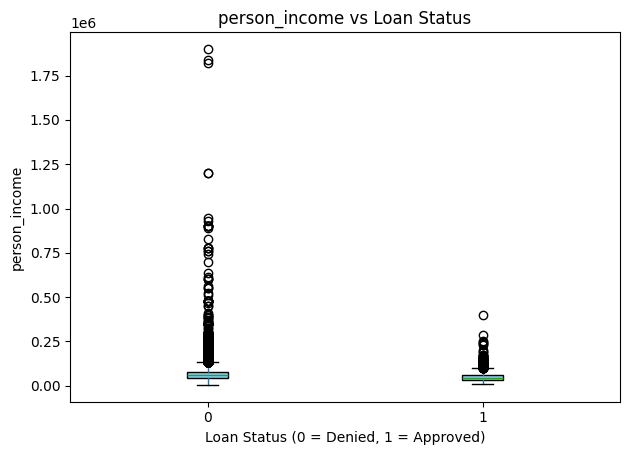

<Figure size 800x600 with 0 Axes>

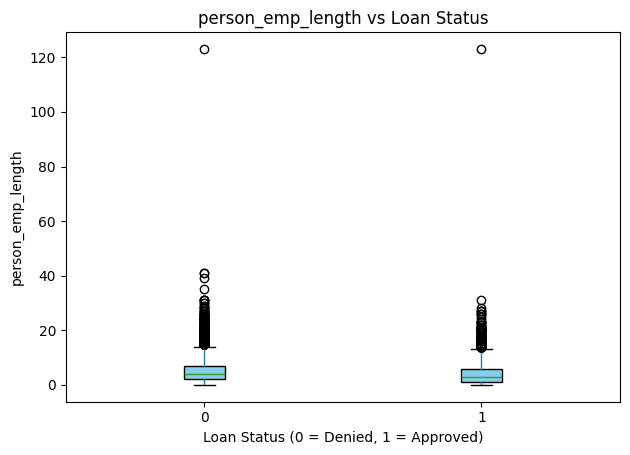

<Figure size 800x600 with 0 Axes>

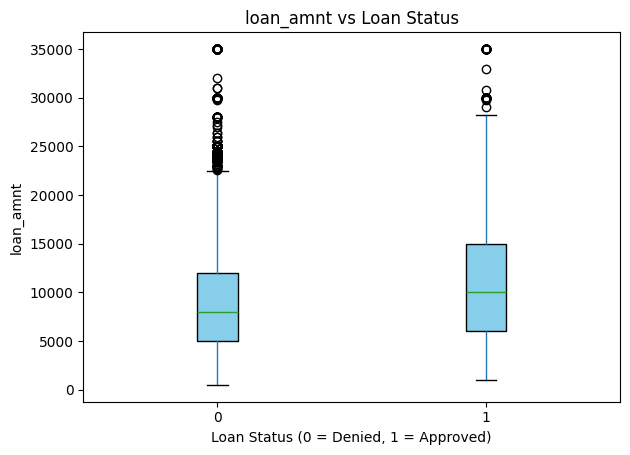

<Figure size 800x600 with 0 Axes>

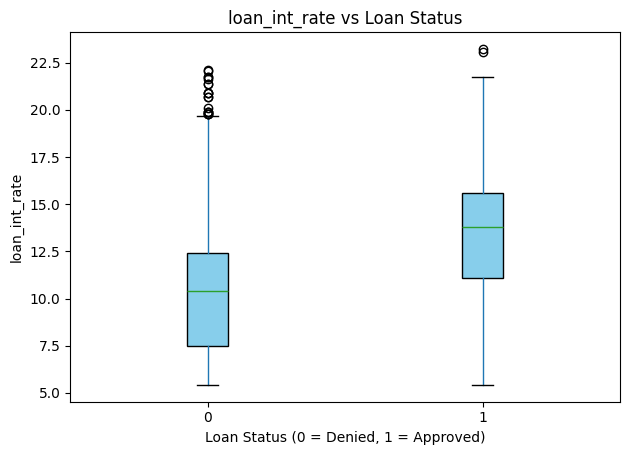

<Figure size 800x600 with 0 Axes>

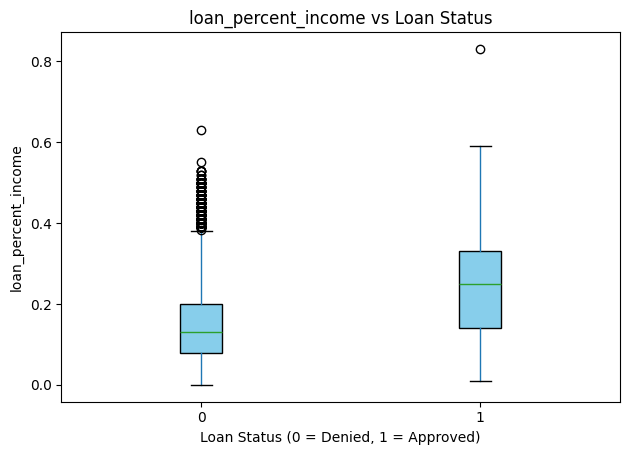

<Figure size 800x600 with 0 Axes>

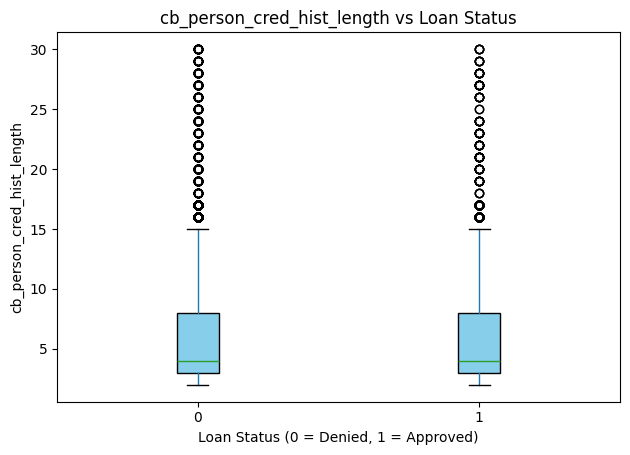

<Figure size 800x600 with 0 Axes>

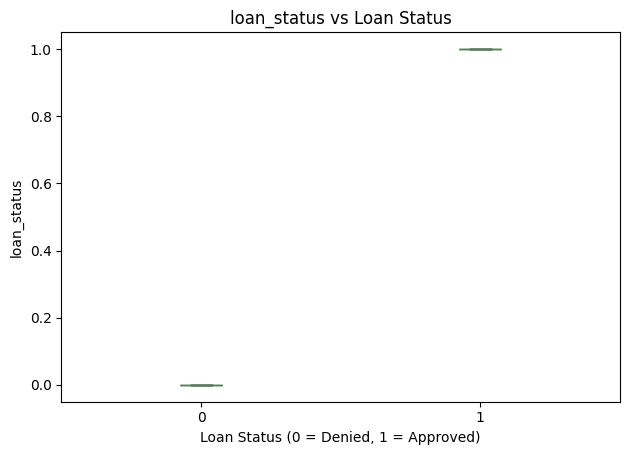

In [8]:
for column in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    loan_data.boxplot(column=column, by='loan_status', grid=False, patch_artist=True,
                      boxprops=dict(facecolor='skyblue', color='black'))
    plt.title(f'{column} vs Loan Status')
    plt.suptitle('')
    plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

1. **id vs Loan Status:**
The id column has no significant relationship with loan_status, as expected. It is likely just a unique identifier and not a useful feature for prediction.
2. **person_age vs Loan Status:**
The age distribution shows most individuals applying for loans are between 20 and 40 years.
There are some outliers with very high ages, which could indicate data entry errors or special cases.
3. **person_income vs Loan Status:**
Most applicants have incomes concentrated at lower ranges, below 200,000.
A few outliers with extremely high incomes may represent wealthy individuals or organizations.
4. **person_emp_length vs Loan Status:**
Employment length is generally concentrated at lower values (below 20 years).
A few applicants have unusually high values for employment length, which may be outliers.
5. **loan_amnt vs Loan Status:**
Loan amounts for both approved and denied loans are similar in range, mostly below 20,000.
Higher loan amounts are rare and often associated with outliers.
6. **loan_int_rate vs Loan Status:**
Interest rates are slightly higher for denied loans compared to approved ones, suggesting loan risk might be linked to higher interest rates.
7. **loan_percent_income vs Loan Status:**
Loan amounts as a percentage of income are generally low for approved loans compared to denied ones.
Higher values of loan_percent_income might be linked to denial.
8. **cb_person_cred_hist_length vs Loan Status:**
The credit history length does not vary significantly between approved and denied loans.
Outliers exist with longer credit histories.
9. **loan_status vs Loan Status:**
This plot is a trivial diagonal, as it directly reflects the binary nature of the loan_status variable (0 or 1).

### Compute the correlation matrix for numerical features

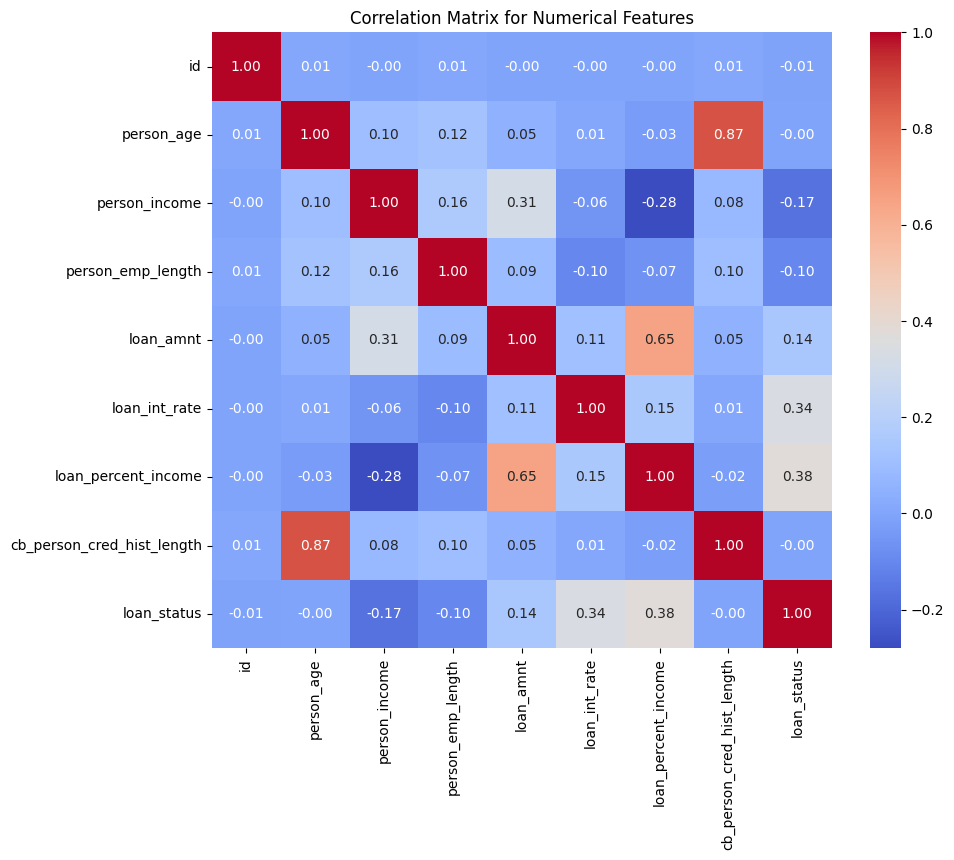

In [9]:
correlation_matrix = numerical_data.corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


**loan_status Correlations:**

**loan_percent_income (0.38):** There is a moderate positive correlation. Loans with a higher percentage of income might be slightly more likely to be approved.

**loan_int_rate (0.34):** A moderate positive correlation exists. Higher interest rates may be associated with loan approval.

**loan_amnt (0.14):** A weak positive correlation suggests that higher loan amounts have a slight relationship with loan approval.
Feature Relationships:

**loan_amnt and loan_percent_income (0.65)**: A strong positive correlation indicates that higher loan amounts are often a higher percentage of the applicant's income.

**person_age and cb_person_cred_hist_length (0.87):** A very strong positive correlation suggests older individuals tend to have longer credit histories.
Other features, such as person_income, person_emp_length, and loan_int_rate, show relatively weak correlations with loan_status.

**id Column:**

This column shows no correlation with any variable, as expected since it is a unique identifier.

**Insights for Feature Selection:**

Highly correlated variables (e.g., loan_percent_income, loan_int_rate) with loan_status should be prioritized for further analysis or modeling.

Weakly correlated variables (e.g., person_emp_length, person_age) may require further feature engineering.

Dropping rows with emplyoment length > 100

In [10]:
emp_above_100=(loan_data["person_emp_length"] >100).sum()
print(emp_above_100)

2


In [11]:
loan_data = loan_data[loan_data.person_emp_length < 100]


###Splitting the data into train, validation and test set

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = loan_data.drop(columns=['loan_status']) 
y = loan_data['loan_status']

In [13]:
X.shape

(58643, 12)

###**Data Preprocessing**

In [14]:
categorical_data = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_data:
    X[col] = encoder.fit_transform(X[col])


In [15]:
numerical_data =X.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

X[numerical_data] = scaler.fit_transform(X[numerical_data])



* Since we don't have any missing values, we no need to handle any.
* **Encoding Categorical Variables:**

    Each category in a column is represented by a unique numerical value.
* **Standardize Numerical Features:**

    To bring numerical features to the same scale, ensuring features with large ranges do not dominate those with smaller ranges. This improves model performance and convergence.

Explained variance by each component: [0.21179196 0.16644274 0.13327321 0.11757048 0.08362765 0.08247956
 0.0740132  0.05540014 0.04780608]
Number of components selected: 9


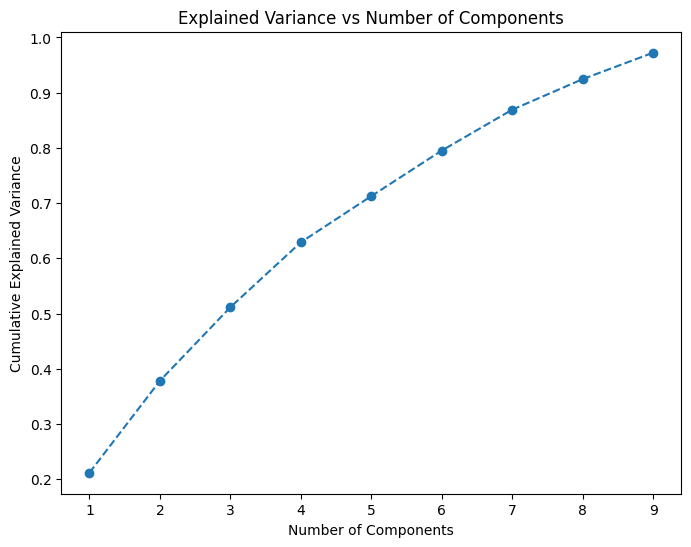

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Number of components selected: {pca.n_components_}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

Train size: (35185, 9), Validation size: (11729, 9), Test size: (11729, 9)


**BASELINE MODELING**

**Logistic Regression:**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

baseline_lr = LogisticRegression(random_state=42)

baseline_lr.fit(X_train, y_train)

y_val_pred = baseline_lr.predict(X_val)
y_val_pred_prob = baseline_lr.predict_proba(X_val)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_val, y_val_pred_prob))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10059
           1       0.74      0.42      0.53      1670

    accuracy                           0.90     11729
   macro avg       0.82      0.70      0.74     11729
weighted avg       0.89      0.90      0.88     11729

Logistic Regression ROC-AUC: 0.8789055947157282


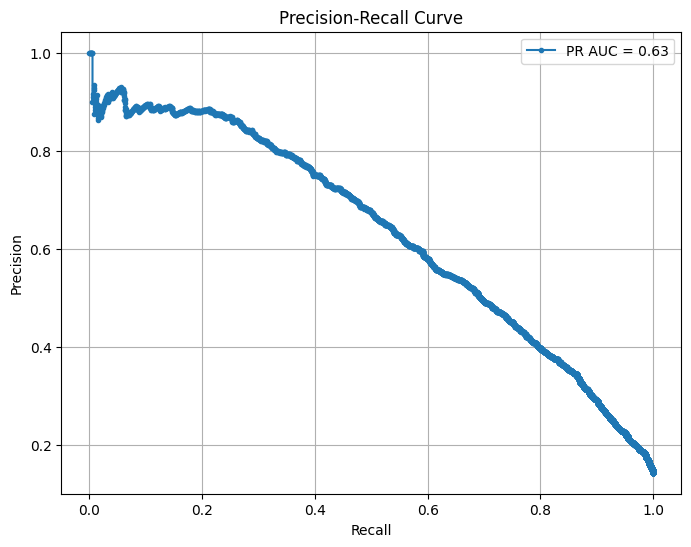

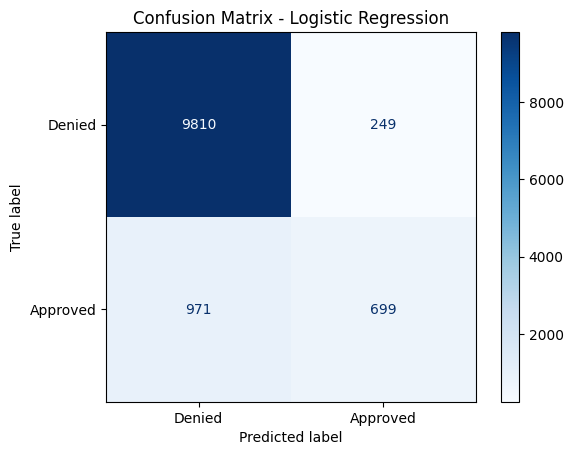

In [20]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

conf_matrix = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Denied', 'Approved'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**SMOTE Sampling**

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Train class distribution:\n{y_train.value_counts()}")
print(f"Resampled Train class distribution:\n{y_train_resampled.value_counts()}")


Original Train class distribution:
loan_status
0    30176
1     5009
Name: count, dtype: int64
Resampled Train class distribution:
loan_status
0    30176
1    30176
Name: count, dtype: int64


**Logistic Regression with resampled data**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_val_pred = model.predict(X_val)
y_val_prob =model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"ROC AUC Score: {roc_auc_score(y_val, y_val_prob):.4f}")
auc = roc_auc_score(y_val, y_val_prob)
print(f"Balanced AUC: {auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     10059
           1       0.39      0.82      0.53      1670

    accuracy                           0.79     11729
   macro avg       0.68      0.80      0.70     11729
weighted avg       0.88      0.79      0.82     11729

ROC AUC Score: 0.8798
Balanced AUC: 0.8798


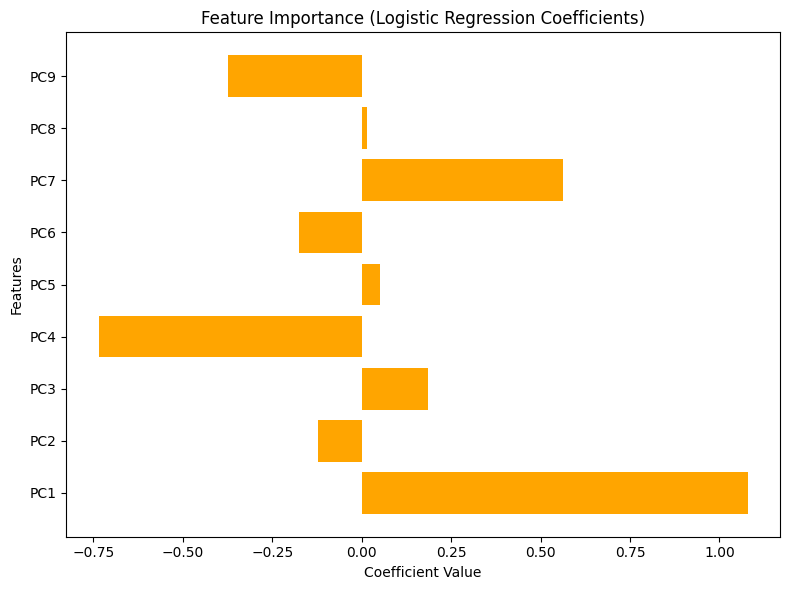

In [23]:
coefficients = model.coef_[0]
features = [f"PC{i+1}" for i in range(len(coefficients))]
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()


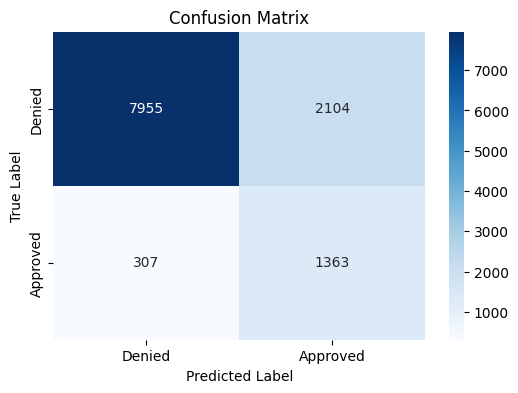

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
y_test_pred_lr = model.predict(X_test)
y_test_pred_prob_lr = model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report (Test):")
print(classification_report(y_test, y_test_pred_lr))
print("Logistic Regression ROC-AUC (Test):", roc_auc_score(y_test, y_test_pred_prob_lr))
auc = roc_auc_score(y_val, y_val_prob)
print(f"Balanced AUC: {auc:.4f}")


Logistic Regression Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     10059
           1       0.38      0.80      0.52      1670

    accuracy                           0.79     11729
   macro avg       0.67      0.79      0.69     11729
weighted avg       0.88      0.79      0.81     11729

Logistic Regression ROC-AUC (Test): 0.8727888094970215
Balanced AUC: 0.8798


**XGBoost Classifier with resampled data**

[0]	validation-logloss:0.69041
[1]	validation-logloss:0.68339
[2]	validation-logloss:0.67646
[3]	validation-logloss:0.66995
[4]	validation-logloss:0.66428
[5]	validation-logloss:0.65535
[6]	validation-logloss:0.64749
[7]	validation-logloss:0.64165
[8]	validation-logloss:0.62719
[9]	validation-logloss:0.61429
[10]	validation-logloss:0.59935
[11]	validation-logloss:0.58585
[12]	validation-logloss:0.58154
[13]	validation-logloss:0.57970
[14]	validation-logloss:0.57387
[15]	validation-logloss:0.56829
[16]	validation-logloss:0.55646
[17]	validation-logloss:0.55313
[18]	validation-logloss:0.55173
[19]	validation-logloss:0.55012
[20]	validation-logloss:0.54989
[21]	validation-logloss:0.54920
[22]	validation-logloss:0.54906
[23]	validation-logloss:0.54628
[24]	validation-logloss:0.53963
[25]	validation-logloss:0.52952
[26]	validation-logloss:0.52784
[27]	validation-logloss:0.52730
[28]	validation-logloss:0.52438
[29]	validation-logloss:0.52217
[30]	validation-logloss:0.52179
[31]	validation-lo

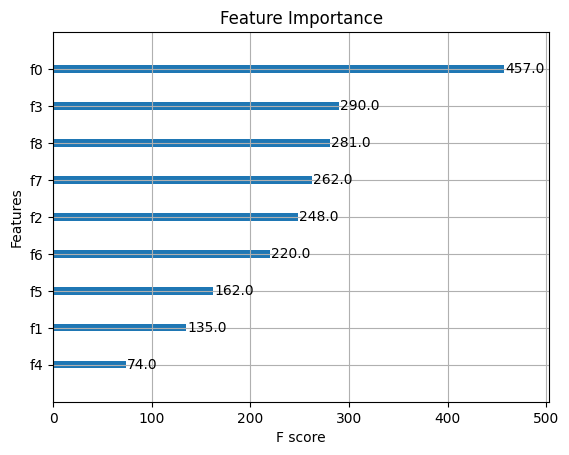

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',  
    'learning_rate': 0.05,         
    'max_depth': 4,                 
    'subsample': 0.5,               
    'colsample_bytree': 0.5,        
    'eval_metric': 'logloss',      
    'lambda': 10,                   
    'alpha': 5,                   
    'booster': 'dart',              
    'rate_drop': 0.2,              
    'skip_drop': 0.2                
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=150,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=True
)

y_val_prob = bst.predict(dval)
y_val_pred_binary = (y_val_prob > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_val_pred_binary)
roc_auc = roc_auc_score(y_val, y_val_prob)
report = classification_report(y_val, y_val_pred_binary)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print("Classification Report:\n", report)

print(f"Balanced AUC: {roc_auc:.4f}")

xgb.plot_importance(bst)
plt.title("Feature Importance")
plt.show()


**SHAP (SHapley Additive exPlanations)**

100%|===================| 11697/11729 [00:45<00:00]       

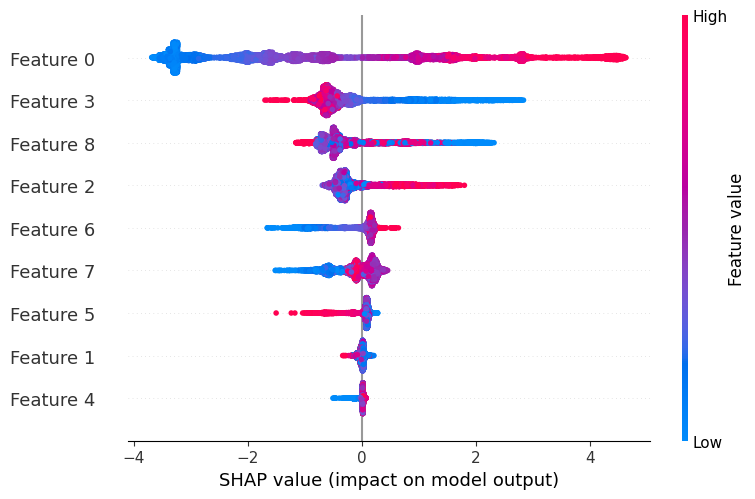

In [27]:
import shap

explainer = shap.Explainer(bst, X_train_resampled)

shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)


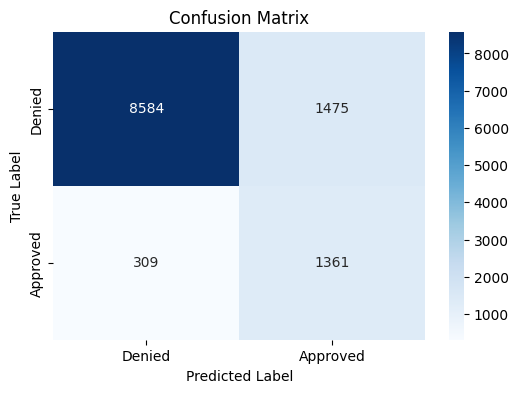

In [28]:
cm = confusion_matrix(y_val, y_val_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy (XGBoost): 0.8424
Test ROC-AUC (XGBoost): 0.8930
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     10059
           1       0.47      0.81      0.59      1670

    accuracy                           0.84     11729
   macro avg       0.72      0.83      0.75     11729
weighted avg       0.89      0.84      0.86     11729



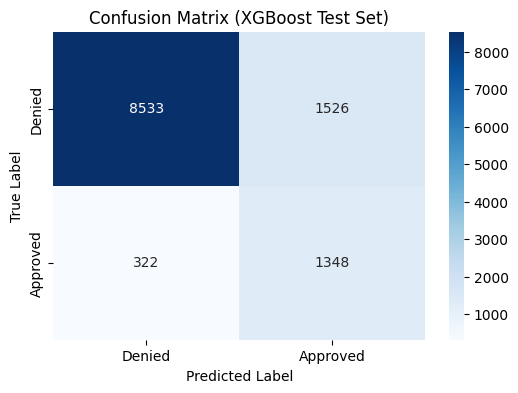

In [73]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_test_prob_xgb = bst.predict(dtest)
y_test_pred_xgb = (y_test_prob_xgb > 0.5).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
test_roc_auc = roc_auc_score(y_test, y_test_prob_xgb)
test_report = classification_report(y_test, y_test_pred_xgb)

print(f"Test Accuracy (XGBoost): {test_accuracy:.4f}")
print(f"Test ROC-AUC (XGBoost): {test_roc_auc:.4f}")
print("Classification Report (Test):\n", test_report)

cm = confusion_matrix(y_test, y_test_pred_xgb)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost Test Set)')
plt.show()



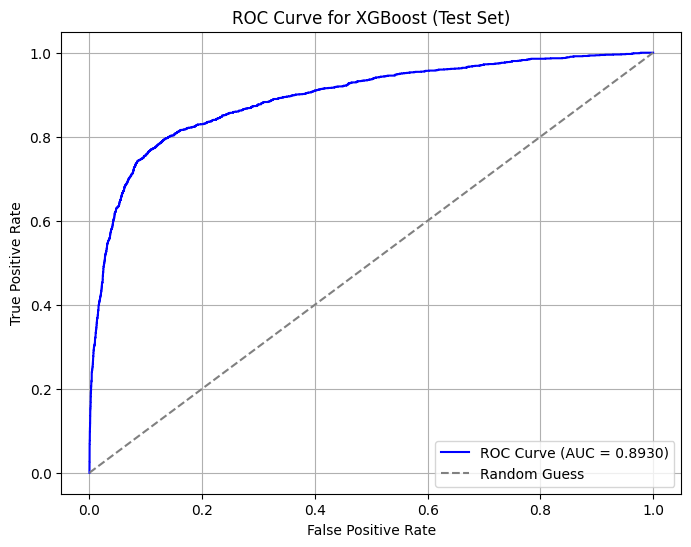

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_xgb)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost (Test Set)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


 **BinaryClassifier with resampled data**

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, roc_auc_score

class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_size = X_train_tensor.shape[1]
model = BinaryClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor).item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.eval()
with torch.no_grad():
    val_predictions = model(X_val_tensor).flatten()
    val_predictions_proba = val_predictions.numpy()
    val_predictions_binary = (val_predictions > 0.5).float().numpy()

print("Neural Network Accuracy:", accuracy_score(y_val, val_predictions_binary))
print("Neural Network AUC-ROC:", roc_auc_score(y_val, val_predictions_proba))


Epoch 1/100, Loss: 804.6945, Val Loss: 0.3801
Epoch 2/100, Loss: 731.7896, Val Loss: 0.3575
Epoch 3/100, Loss: 703.4657, Val Loss: 0.3377
Epoch 4/100, Loss: 681.8934, Val Loss: 0.3204
Epoch 5/100, Loss: 665.9288, Val Loss: 0.3045
Epoch 6/100, Loss: 653.7706, Val Loss: 0.3036
Epoch 7/100, Loss: 650.4225, Val Loss: 0.3022
Epoch 8/100, Loss: 639.3565, Val Loss: 0.3092
Epoch 9/100, Loss: 636.5916, Val Loss: 0.3064
Epoch 10/100, Loss: 633.3739, Val Loss: 0.2955
Epoch 11/100, Loss: 631.5607, Val Loss: 0.2940
Epoch 12/100, Loss: 627.6048, Val Loss: 0.2999
Epoch 13/100, Loss: 624.4511, Val Loss: 0.2935
Epoch 14/100, Loss: 618.9058, Val Loss: 0.3176
Epoch 15/100, Loss: 618.7088, Val Loss: 0.2964
Epoch 16/100, Loss: 616.4034, Val Loss: 0.2914
Epoch 17/100, Loss: 617.0555, Val Loss: 0.2930
Epoch 18/100, Loss: 613.5767, Val Loss: 0.2522
Epoch 19/100, Loss: 614.1019, Val Loss: 0.2952
Epoch 20/100, Loss: 614.0650, Val Loss: 0.3073
Epoch 21/100, Loss: 613.4160, Val Loss: 0.2838
Epoch 22/100, Loss: 61

Test Accuracy: 0.7383
Test ROC-AUC: 0.9169

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10059
           1       0.65      0.76      0.70      1670

    accuracy                           0.91     11729
   macro avg       0.81      0.85      0.83     11729
weighted avg       0.92      0.91      0.91     11729



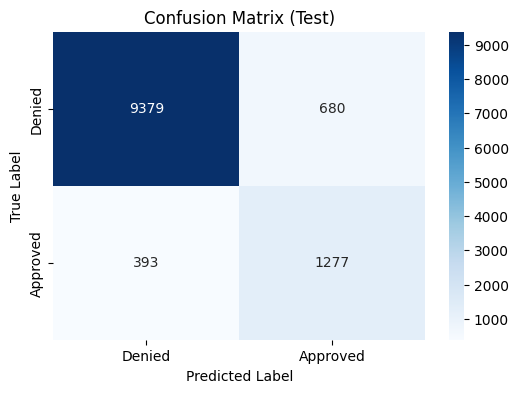

In [32]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze()
    test_predictions_binary = (test_predictions > 0.5).float()
    test_accuracy = (test_predictions_binary == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {test_accuracy:.4f}")

    from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
    test_roc_auc = roc_auc_score(y_test, test_predictions.numpy())
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, test_predictions_binary.numpy()))

    cm = confusion_matrix(y_test, test_predictions_binary.numpy())
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Test)')
    plt.show()


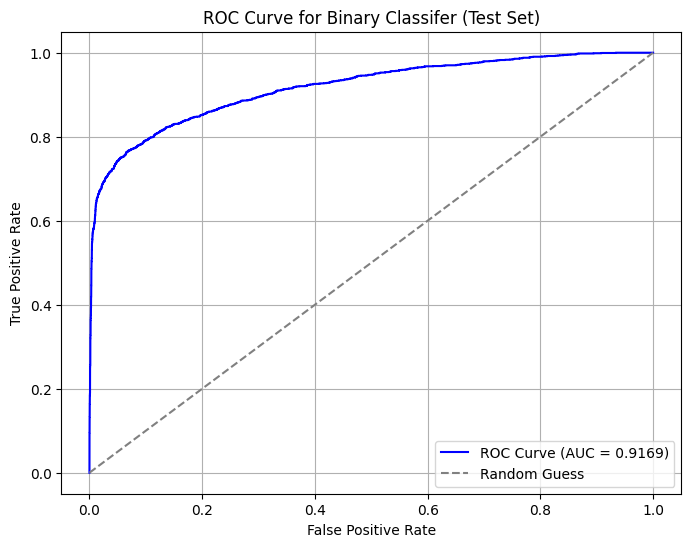

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

test_probabilities = torch.sigmoid(test_predictions).numpy()

fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classifer (Test Set)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


**RandomForestClassifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


max_trees = 150
step = 5
patience = 5
best_auc = 0
no_improvement_count = 0

best_model = None
auc_scores = []

for n_trees in range(step, max_trees + 1, step):
    rf_model = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    y_val_prob = rf_model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_prob)
    auc_scores.append(val_auc)

    print(f"n_estimators: {n_trees}, Validation AUC-ROC: {val_auc:.4f}")

    if val_auc > best_auc:
        best_auc = val_auc
        best_model = rf_model
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= patience:
        print(f"Early stopping triggered at n_estimators = {n_trees}")
        break

y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]



n_estimators: 5, Validation AUC-ROC: 0.9018
n_estimators: 10, Validation AUC-ROC: 0.9053
n_estimators: 15, Validation AUC-ROC: 0.9066
n_estimators: 20, Validation AUC-ROC: 0.9074
n_estimators: 25, Validation AUC-ROC: 0.9078
n_estimators: 30, Validation AUC-ROC: 0.9081
n_estimators: 35, Validation AUC-ROC: 0.9084
n_estimators: 40, Validation AUC-ROC: 0.9089
n_estimators: 45, Validation AUC-ROC: 0.9094
n_estimators: 50, Validation AUC-ROC: 0.9095
n_estimators: 55, Validation AUC-ROC: 0.9095
n_estimators: 60, Validation AUC-ROC: 0.9095
n_estimators: 65, Validation AUC-ROC: 0.9096
n_estimators: 70, Validation AUC-ROC: 0.9095
n_estimators: 75, Validation AUC-ROC: 0.9096
n_estimators: 80, Validation AUC-ROC: 0.9097
n_estimators: 85, Validation AUC-ROC: 0.9099
n_estimators: 90, Validation AUC-ROC: 0.9099
n_estimators: 95, Validation AUC-ROC: 0.9100
n_estimators: 100, Validation AUC-ROC: 0.9102
n_estimators: 105, Validation AUC-ROC: 0.9102
n_estimators: 110, Validation AUC-ROC: 0.9101
n_estima

In [69]:
print("Classification Report (Validation Set) Of RandomForestClassifier:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_val_pred))

print(f"ROC AUC Score (Validation Set): {roc_auc_score(y_val, y_val_prob):.4f}")


Classification Report (Validation Set) Of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10059
           1       0.58      0.78      0.66      1670

    accuracy                           0.89     11729
   macro avg       0.77      0.84      0.80     11729
weighted avg       0.91      0.89      0.89     11729

Confusion Matrix (Validation Set):
[[9119  940]
 [ 374 1296]]
ROC AUC Score (Validation Set): 0.9102


In [70]:
y_test_pred_rf = rf_model.predict(X_test)
y_test_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report (Test Set) for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

print(f"ROC AUC Score (Test Set): {roc_auc_score(y_test, y_test_prob_rf):.4f}")


Classification Report (Test Set) for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10059
           1       0.57      0.76      0.66      1670

    accuracy                           0.89     11729
   macro avg       0.77      0.83      0.79     11729
weighted avg       0.90      0.89      0.89     11729

ROC AUC Score (Test Set): 0.9042


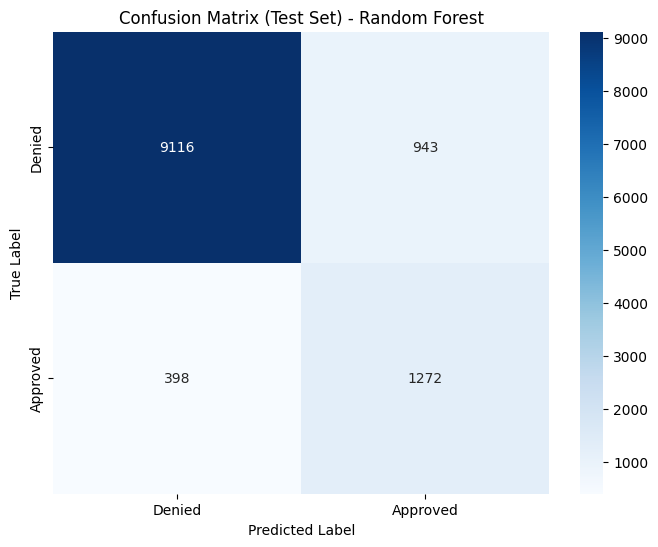

In [65]:
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set) - Random Forest')
plt.show()


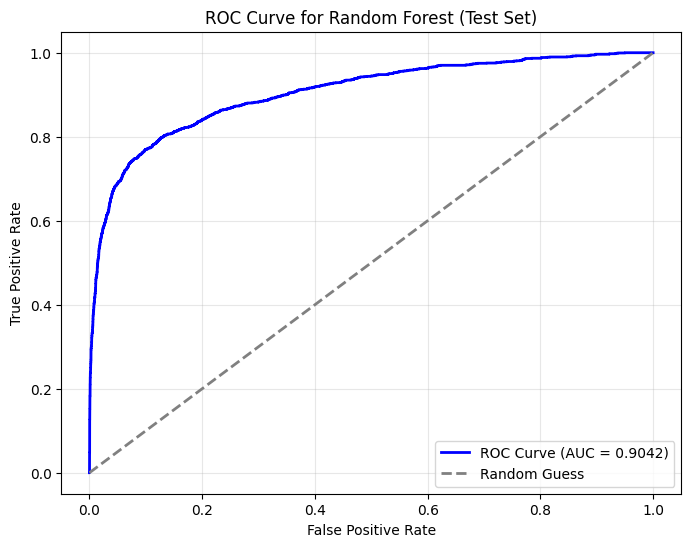

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Test Set)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


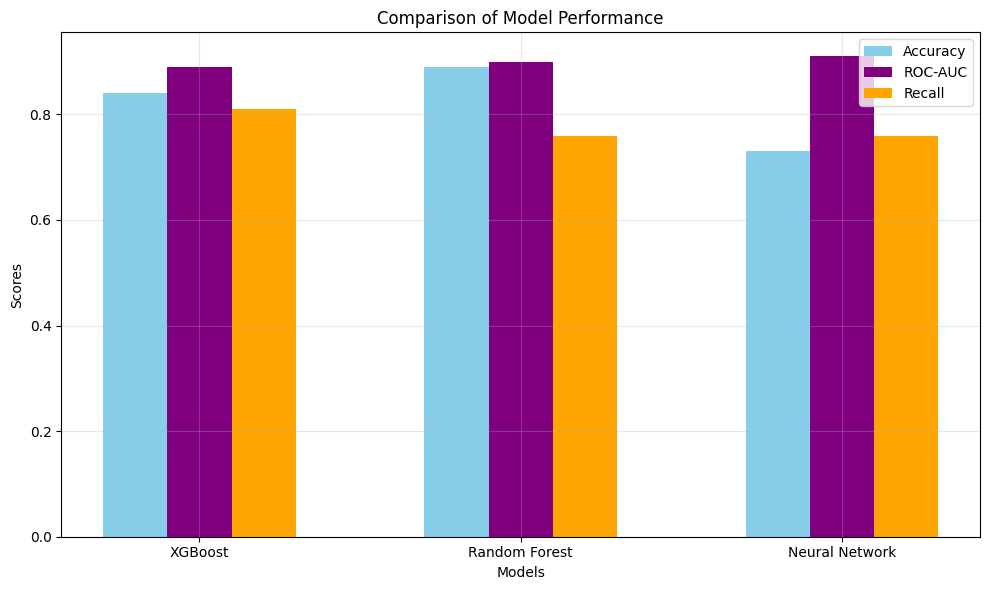

In [72]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'Random Forest', 'Neural Network']
accuracy_scores = [0.84, 0.89, 0.73]
roc_auc_scores = [0.89, 0.90, 0.91]
recall_scores = [0.81, 0.76, 0.76]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x - width, accuracy_scores, width, label='Accuracy', color='skyblue')
plt.bar(x, roc_auc_scores, width, label='ROC-AUC', color='purple')
plt.bar(x + width, recall_scores, width, label='Recall', color='orange')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
